In [5]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
my_list = [5,4,6,9,1,2,3,7,8,0]

# Classical Search

In [7]:
def oracle(number):
    winning_number = 8
    if number == winning_number:
        response = True
    else:
        response = False
    return response

In [8]:
for index , number in enumerate(my_list):
    if oracle(number) is True:
        print(f"Winning number index : {index}")
        print(f"Execution count : {index+1}")
        break

Winning number index : 8
Execution count : 9


# Grover's Algorithm

## Oracle Circuit - (Winning State 11)

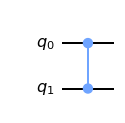

In [9]:
oracleCircuit = QuantumCircuit(2,name = "oracleCircuit")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output="mpl")

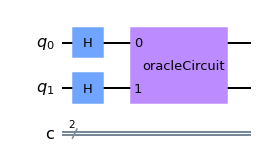

In [10]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output="mpl")

## Reflection Circuit

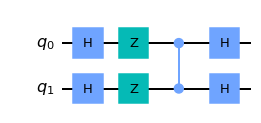

In [12]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output="mpl")

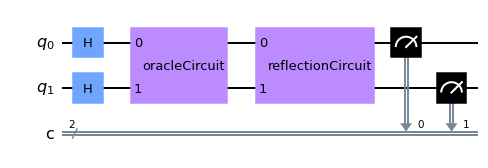

In [13]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output="mpl")

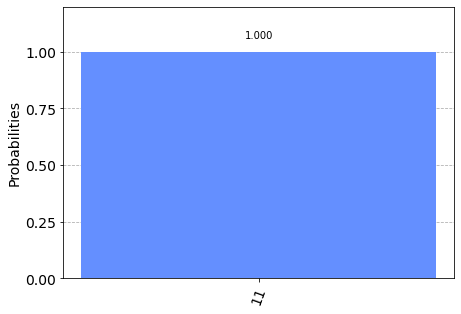

In [14]:
backend = Aer.get_backend("qasm_simulator")
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])